In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
%matplotlib inline  

# Plucked String

In [15]:
#Plucked String
Nx = 100
Nt = 200
c = 2000
dx = 0.1
dt = dx/c

C = (c*dt/dx)**2


u = np.zeros((Nx, Nt))

#initial conditions

for x in range(1, 21):       #initial displacements
    u[x,0] = 10/20 * x 
for x in range(21, 100):
    u[x,0] = -10/79 * x + 10/79 * 99
    
def initial_velocity(x):
    return 0                          #one may define some initial velocity function. I take it as zero.


#boundary conditions
u[0,:] = 0
u[Nx-1,:]= 0

for t in range(0, Nt-1):
    for x in range(1, Nx-1):
        
        if t==0:
            u[x,t+1] = (C/2)*(u[x+1, 0] + u[x-1, 0]) + (1-C)*u[x, 0] + dt*initial_velocity(x)
            
        else:
            u[x,t+1] = C*(u[x+1, t] + u[x-1, t]) + 2*(1-C)*u[x, t] - u[x, t-1]


print(u)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [0.25316456 0.25316456 0.25316456 ... 0.25316456 0.25316456 0.25316456]
 [0.12658228 0.12658228 0.12658228 ... 0.12658228 0.12658228 0.12658228]
 [0.         0.         0.         ... 0.         0.         0.        ]]


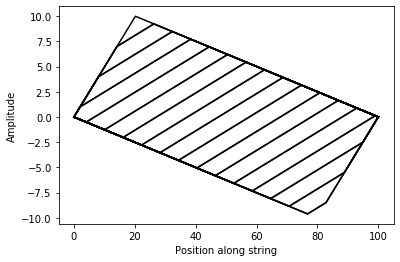

In [17]:
positions = np.linspace(0, Nx, Nx)
times = np.linspace(0, Nt, Nt)
#plt.plot(positions, u[:,0])
#plt.plot(positions, u[:,10])
#plt.plot(positions, u[:,100])
#plt.plot(positions, u[:,150])
#plt.plot(positions, u[:,200])

for i in range(0, int(Nt/6)):
    plt.plot(positions, u[:,i*6], color = 'black')
plt.xlabel(r'Position along string')
plt.ylabel(r'Amplitude')
plt.show()

5e-05


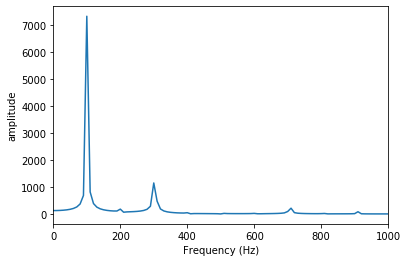

In [259]:
#Fourier Transform
x = u[50, :]
ft = np.fft.fft(x) # np.fft.ftt() performs the Fast Fourier Transform (FFT) of its argument

t_ft=[] # create empty array for i.e. the frequency values. You will plot your fft data above against this array.
for i in range (Nt):
    t_ft.append(i/(Nt*dt)) # scaling each integer value by t_max
print(dt)
plt.plot(t_ft, abs(ft))
plt.xlabel(r'Frequency (Hz)')
plt.ylabel(r'amplitude')
plt.xlim(0, 1000)
plt.show()

# Interface: Transmission and reflection

In [19]:
#Wave refraction at an interface

Nx = 200
Nt = 500

dx = 0.1
dt = 0.000005 #dx/c

u = np.zeros((Nx, Nt))

#initial conditions
#for x in range(1, 80):
    #u[x,0] = 0.2*np.sin(x*np.pi/19)     #initial displacements

    
def initial_velocity(x):
    return  0                       #one may define some initial velocity function. I take it as zero.


#boundary conditions
#u[0,:] = 0
u[Nx-1,:]= 0

for t in range(0, Nt-1):
    for x in range(1, Nx-1):
            if t < 100:
                u[0, t] = 0.1*np.sin(2*np.pi*5000*dt*t) 
            else:
                u[0, t] = 0
            if t==0:
                
                if x <= 100:
                    c = 20000
                    
                    C = (c*dt/dx)**2
                    u[x,t+1] = (C/2)*(u[x+1, 0] + u[x-1, 0]) + (1-C)*u[x, 0] + dt*initial_velocity(x)
                    
                else:
                    c = 10000
                    
                    C = (c*dt/dx)**2
                    u[x,t+1] = (C/2)*(u[x+1, 0] + u[x-1, 0]) + (1-C)*u[x, 0] + dt*initial_velocity(x)
          
            else:
                
                if x <= 100:
                    c = 20000
                    C = (c*dt/dx)**2
                    u[x,t+1] = C*(u[x+1, t] + u[x-1, t]) + 2*(1-C)*u[x, t] - u[x, t-1]
    
                else:
                    c = 10000
                    C = (c*dt/dx)**2
                    u[x,t+1] = C*(u[x+1, t] + u[x-1, t]) + 2*(1-C)*u[x, t] - u[x, t-1]
            
print(u)

[[0.         0.01564345 0.0309017  ... 0.         0.         0.        ]
 [0.         0.         0.01564345 ... 0.00254232 0.00285427 0.00312513]
 [0.         0.         0.         ... 0.00500149 0.00566745 0.00622201]
 ...
 [0.         0.         0.         ... 0.00682498 0.00836025 0.00919284]
 [0.         0.         0.         ... 0.00110511 0.00157668 0.00334997]
 [0.         0.         0.         ... 0.         0.         0.        ]]


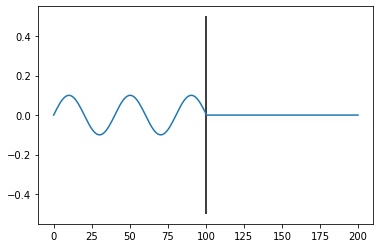

In [21]:
positions = np.linspace(0, Nx, Nx)
times = np.linspace(0, Nt, Nt)
plt.plot(positions, u[:,100])
#img = []
#for i in range(0, int(Nt/80)):
   # plt.plot(positions, u[:,i*40], color = 'black')

plt.vlines(100, 0.5, -0.5)
plt.show()  

5e-06


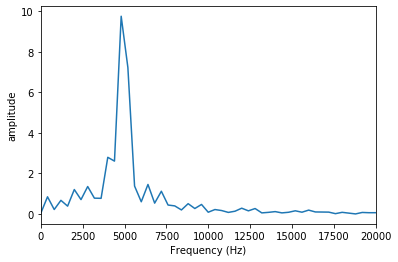

In [46]:
#Fourier Transform
x = u[140, :]
ft = np.fft.fft(x) # np.fft.ftt() performs the Fast Fourier Transform (FFT) of its argument

t_ft=[] # create empty array for i.e. the frequency values. You will plot your fft data above against this array.
for i in range (Nt):
    t_ft.append(i/(Nt*dt)) # scaling each integer value by t_max
print(dt)
plt.plot(t_ft, abs(ft))
plt.xlabel(r'Frequency (Hz)')
plt.ylabel(r'amplitude')
plt.xlim(0, 20000)
plt.show()

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


fig size: 72.0 DPI, size in inches [6. 4.]
timestep 0
timestep 0
timestep 1
timestep 2
timestep 3
timestep 4
timestep 5
timestep 6
timestep 7
timestep 8
timestep 9
timestep 10
timestep 11
timestep 12
timestep 13
timestep 14
timestep 15
timestep 16
timestep 17
timestep 18
timestep 19
timestep 20
timestep 21
timestep 22
timestep 23
timestep 24
timestep 25
timestep 26
timestep 27
timestep 28
timestep 29
timestep 30
timestep 31
timestep 32
timestep 33
timestep 34
timestep 35
timestep 36
timestep 37
timestep 38
timestep 39
timestep 40
timestep 41
timestep 42
timestep 43
timestep 44
timestep 45
timestep 46
timestep 47
timestep 48
timestep 49
timestep 50
timestep 51
timestep 52
timestep 53
timestep 54
timestep 55
timestep 56
timestep 57
timestep 58
timestep 59
timestep 60
timestep 61
timestep 62
timestep 63
timestep 64
timestep 65
timestep 66
timestep 67
timestep 68
timestep 69
timestep 70
timestep 71
timestep 72
timestep 73
timestep 74
timestep 75
timestep 76
timestep 77
timestep 78
timestep

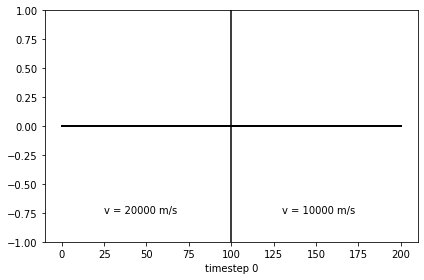

In [69]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

# Plot a scatter that persists (isn't redrawn) and the initial line.
#x = np.arange(0, 20, 0.1)
ax.vlines(100, 1, -1)
ax.text(25, -0.75, "v = 20000 m/s")
ax.text(130, -0.75, "v = 10000 m/s")
f = u[:,0]
line, = ax.plot(positions, f, 'r-', linewidth=2, color='black')

def update(i):
    label = 'timestep {0}'.format(i)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    f = u[:,i]
    line.set_ydata(f)
    ax.set_xlabel(label)
    ax.set_ylim(-1, 1)
    return line, ax

#if __name__ == '__main__':
    # FuncAnimation will call the 'update' function for each frame; here
    # animating over 10 frames, with an interval of 200ms between frames.
#anim = FuncAnimation(fig, update, frames=np.arange(0, Nt), interval=2)
#if len(sys.argv) > 1 and sys.argv[1] == 'save':
#anim.save('Interface2.gif', dpi=20, writer='imagemagick')
    #else:
        #plt.show() will just loop the animation forever.
        #plt.show()

# Forced Standing wave

In [86]:
#Forced Standing wave
Nx = 100
Nt = 500
c = 200
dx = 0.1
dt = dx/c

C = (c*dt/dx)**2


u = np.zeros((Nx, Nt))

#initial conditions
#u[0, t] = 0.1*np.sin(2*np.pi*200*dt*t)    #Constant forcing

    
def initial_velocity(x):
    return 0                          #one may define some initial velocity function. I take it as zero.


#boundary conditions
u[0,:] = 0
u[Nx-1,:]= 0

for t in range(0, Nt-1):
    u[0, t] = 0.1*np.sin(2*np.pi*200*dt*t)
    for x in range(1, Nx-1):
        
        if t==0:
            u[x,t+1] = (C/2)*(u[x+1, 0] + u[x-1, 0]) + (1-C)*u[x, 0] + dt*initial_velocity(x)
            
        else:
            u[x,t+1] = C*(u[x+1, t] + u[x-1, t]) + 2*(1-C)*u[x, t] - u[x, t-1]


print(u)

[[ 0.          0.05877853  0.09510565 ... -0.09510565 -0.09510565
   0.        ]
 [ 0.          0.          0.05877853 ... -0.24898983 -0.24898983
  -0.15388418]
 [ 0.          0.          0.         ... -0.30776835 -0.30776835
  -0.1902113 ]
 ...
 [ 0.          0.          0.         ...  0.30776835  0.24898983
   0.09510565]
 [ 0.          0.          0.         ...  0.1902113   0.15388418
   0.05877853]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


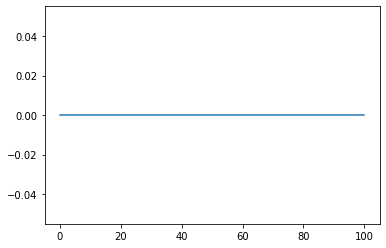

In [81]:
#Graphing
positions = np.linspace(0, Nx, Nx)
times = np.linspace(0, Nt, Nt)
plt.plot(positions, u[:,0])
#img = []
#for i in range(0, int(Nt/80)):
   # plt.plot(positions, u[:,i*40], color = 'black')

#plt.vlines(100, 1, -1)
plt.show()  

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


fig size: 72.0 DPI, size in inches [6. 4.]
timestep 0
timestep 0
timestep 1
timestep 2
timestep 3
timestep 4
timestep 5
timestep 6
timestep 7
timestep 8
timestep 9
timestep 10
timestep 11
timestep 12
timestep 13
timestep 14
timestep 15
timestep 16
timestep 17
timestep 18
timestep 19
timestep 20
timestep 21
timestep 22
timestep 23
timestep 24
timestep 25
timestep 26
timestep 27
timestep 28
timestep 29
timestep 30
timestep 31
timestep 32
timestep 33
timestep 34
timestep 35
timestep 36
timestep 37
timestep 38
timestep 39
timestep 40
timestep 41
timestep 42
timestep 43
timestep 44
timestep 45
timestep 46
timestep 47
timestep 48
timestep 49
timestep 50
timestep 51
timestep 52
timestep 53
timestep 54
timestep 55
timestep 56
timestep 57
timestep 58
timestep 59
timestep 60
timestep 61
timestep 62
timestep 63
timestep 64
timestep 65
timestep 66
timestep 67
timestep 68
timestep 69
timestep 70
timestep 71
timestep 72
timestep 73
timestep 74
timestep 75
timestep 76
timestep 77
timestep 78
timestep

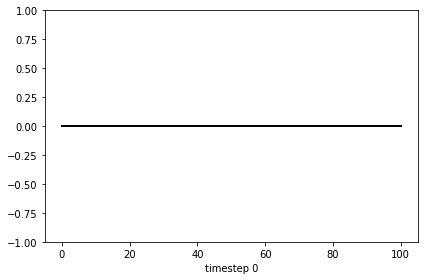

In [87]:
#Making the animation
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

# Plot a scatter that persists (isn't redrawn) and the initial line.
#x = np.arange(0, 20, 0.1)
#ax.vlines(100, 1, -1)
#ax.text(25, -0.75, "v = 20000 m/s")
#ax.text(130, -0.75, "v = 10000 m/s")
f = u[:,0]
line, = ax.plot(positions, f, 'r-', linewidth=2, color='black')

def update(i):
    label = 'timestep {0}'.format(i)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    f = u[:,i]
    line.set_ydata(f)
    ax.set_xlabel(label)
    ax.set_ylim(-1, 1)
    return line, ax

if __name__ == '__main__':
    # FuncAnimation will call the 'update' function for each frame; here
anim = FuncAnimation(fig, update, frames=np.arange(0, 2), interval=1)
    # animating over 10 frames, with an interval of 200ms between frames.
anim.save('forced standing wave2.gif', dpi=20, writer='imagemagick')
    else:
        plt.show() will just loop the animation forever.
        plt.show()